In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.graph_objects as go

import plotly.figure_factory as ff

from plotly.subplots import make_subplots


C:\ANACONDA\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"C:\Users\ASUS\Desktop\PYTHON\EDA dataset\Graded Assignment EDA\bank_marketing_updated_v1.csv",
                  names =["Customer_id","Age","Salary","Balance","Marital_Status","Job_Education","Targeted_Customer","Default_Loan","Housing_loan","Other_loan","Contact_Type",
                        "Contact_Day","Contact_Month_Year","Call_Duration","No_Of_Campaign","Pdays","Previous_Campaign","P_Outcome","Response" ],header =2)
df

,Customer_id,Age,Salary,Balance,Marital_Status,Job_Education,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         45211 non-null  int64  
 1   Age                 45191 non-null  float64
 2   Salary              45211 non-null  int64  
 3   Balance             45211 non-null  int64  
 4   Marital_Status      45211 non-null  object 
 5   Job_Education       45211 non-null  object 
 6   Targeted_Customer   45211 non-null  object 
 7   Default_Loan        45211 non-null  object 
 8   Housing_loan        45211 non-null  object 
 9   Other_loan          45211 non-null  object 
 10  Contact_Type        45211 non-null  object 
 11  Contact_Day         45211 non-null  int64  
 12  Contact_Month_Year  45161 non-null  object 
 13  Call_Duration       45211 non-null  object 
 14  No_Of_Campaign      45211 non-null  int64  
 15  Pdays               45211 non-null  int64  
 16  Prev

In [4]:
df=df.drop("Customer_id",axis =1)  ## dropping Customer_id column as same is not required.
df

,Age,Salary,Balance,Marital_Status,Job_Education,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [5]:
df[["Job","Education"]]= df.Job_Education.str.split(",",expand =True) ## expanding job & education to 2 columns
df

,Age,Salary,Balance,Marital_Status,Job_Education,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [6]:
df=df.drop("Job_Education",axis =1)  ## Column drop Job_Education
df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [25]:
non_numeric_columns = ["Marital_Status","Job","Education","Targeted_Customer","Default_Loan","Housing_loan","Other_loan","Contact_Type",
                        "P_Outcome","Response" ]
df[non_numeric_columns] = df[non_numeric_columns].astype(str).apply(lambda x: x.str.title())
df

,Customer_id,Age,Salary,Balance,Marital_Status,Job_Education,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education
0,1,58.0,100000,2143,Married,"management,tertiary",Yes,No,Yes,No,Unknown,5,"may, 2017",261 sec,1,-1,0,Unknown,No,Management,Tertiary
1,2,44.0,60000,29,Single,"technician,secondary",Yes,No,Yes,No,Unknown,5,"may, 2017",151 sec,1,-1,0,Unknown,No,Technician,Secondary
2,3,33.0,120000,2,Married,"entrepreneur,secondary",Yes,No,Yes,Yes,Unknown,5,"may, 2017",76 sec,1,-1,0,Unknown,No,Entrepreneur,Secondary
3,4,47.0,20000,1506,Married,"blue-collar,unknown",No,No,Yes,No,Unknown,5,"may, 2017",92 sec,1,-1,0,Unknown,No,Blue-Collar,Unknown
4,5,33.0,0,1,Single,"unknown,unknown",No,No,No,No,Unknown,5,"may, 2017",198 sec,1,-1,0,Unknown,No,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,Married,"technician,tertiary",Yes,No,No,No,Cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,Unknown,Yes,Technician,Tertiary
45207,45208,71.0,55000,1729,Divorced,"retired,primary",Yes,No,No,No,Cellular,17,"nov, 2017",7.6 min,2,-1,0,Unknown,Yes,Retired,Primary
45208,45209,72.0,55000,5715,Married,"retired,secondary",Yes,No,No,No,Cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,Success,Yes,Retired,Secondary
45209,45210,57.0,20000,668,Married,"blue-collar,secondary",Yes,No,No,No,Telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,Unknown,No,Blue-Collar,Secondary


In [46]:
df.Call_Duration.value_counts()

1.5 min                 138
1.68333333333333 min    129
2.06666666666667 min    129
1.73333333333333 min    127
2.03333333333333 min    127
                       ... 
1500 sec                  1
22.1666666666667 min      1
868 sec                   1
1269 sec                  1
16.2833333333333 min      1
Name: Call_Duration, Length: 2646, dtype: int64

In [47]:
df.Call_Duration = df.Call_Duration.apply( lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]) )
df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education,Income_Group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,-1,0,unknown,no,management,tertiary,High Income
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,-1,0,unknown,no,technician,secondary,Upper Middle Income
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,-1,0,unknown,no,entrepreneur,secondary,High Income
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,-1,0,unknown,no,blue-collar,unknown,Low Income
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,-1,0,unknown,no,unknown,unknown,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.283333,3,-1,0,unknown,yes,technician,tertiary,Upper Middle Income
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.600000,2,-1,0,unknown,yes,retired,primary,Upper Middle Income
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.783333,5,184,3,success,yes,retired,secondary,Upper Middle Income
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.466667,4,-1,0,unknown,no,blue-collar,secondary,Low Income


In [7]:
df.columns

Index(['Age', 'Salary', 'Balance', 'Marital_Status', 'Targeted_Customer',
       'Default_Loan', 'Housing_loan', 'Other_loan', 'Contact_Type',
       'Contact_Day', 'Contact_Month_Year', 'Call_Duration', 'No_Of_Campaign',
       'Pdays', 'Previous_Campaign', 'P_Outcome', 'Response', 'Job',
       'Education'],
      dtype='object')

In [8]:
df.shape

(45211, 19)

In [9]:
df.describe()

,Age,Salary,Balance,Contact_Day,No_Of_Campaign,Pdays,Previous_Campaign
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [10]:
df.isna().sum()

Age                   20
Salary                 0
Balance                0
Marital_Status         0
Targeted_Customer      0
Default_Loan           0
Housing_loan           0
Other_loan             0
Contact_Type           0
Contact_Day            0
Contact_Month_Year    50
Call_Duration          0
No_Of_Campaign         0
Pdays                  0
Previous_Campaign      0
P_Outcome              0
Response              30
Job                    0
Education              0
dtype: int64

In [11]:
df['Marital_Status'].value_counts()

married     27214
single      12790
divorced     5207
Name: Marital_Status, dtype: int64

In [12]:
df['Job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: Job, dtype: int64

In [13]:
df['Education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: Education, dtype: int64

In [14]:
df['Targeted_Customer'].value_counts()

yes    37091
no      8120
Name: Targeted_Customer, dtype: int64

In [15]:
df['Default_Loan'].value_counts()

no     44396
yes      815
Name: Default_Loan, dtype: int64

In [16]:
df['Housing_loan'].value_counts()

yes    25130
no     20081
Name: Housing_loan, dtype: int64

In [17]:
df['Other_loan'].value_counts()

no     37967
yes     7244
Name: Other_loan, dtype: int64

In [18]:
df['Contact_Type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: Contact_Type, dtype: int64

In [19]:
df['P_Outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: P_Outcome, dtype: int64

In [20]:
df['Response'].value_counts()

no     39894
yes     5287
Name: Response, dtype: int64

In [21]:
df['Salary'].describe()

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: Salary, dtype: float64

<Axes: xlabel='Salary', ylabel='Count'>

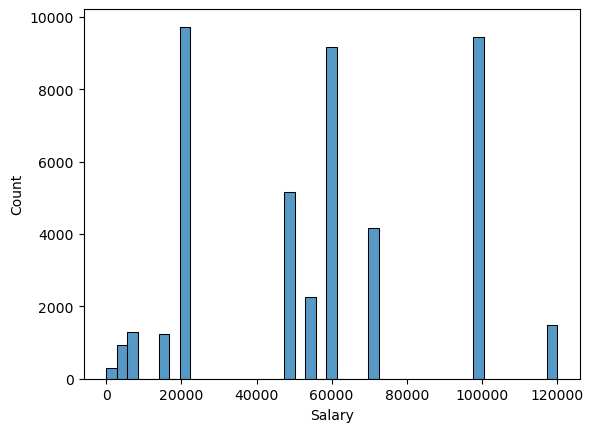

In [22]:
sns.histplot(x = df["Salary"])

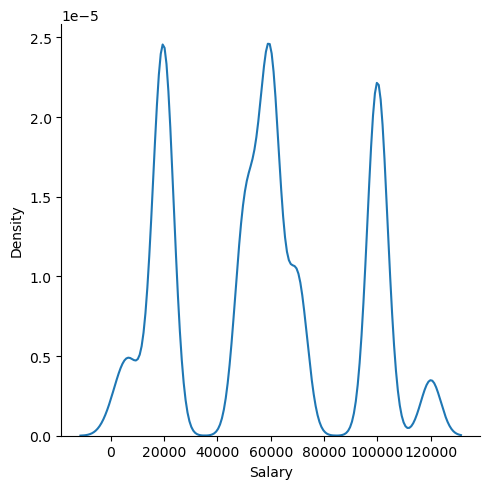

In [23]:
sns.displot(data =df,x = "Salary",kind ="kde")

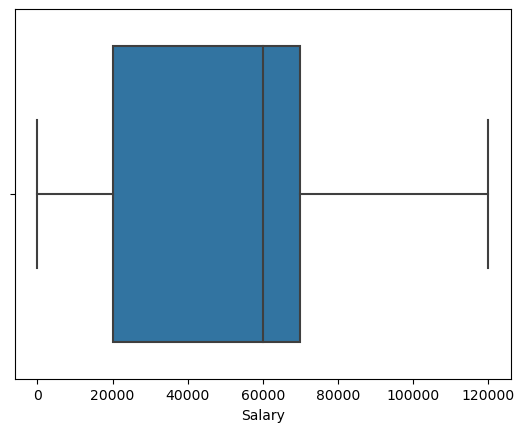

<Figure size 500x500 with 0 Axes>

In [24]:
sns.boxplot(x=df.Salary)
plt.figure(figsize = [5,5])
plt.show()

In [25]:
bins = [0, 25000, 50000, 80000, float('inf')]  # Example bins for income groups

# Define labels for the income groups
group_labels = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']

# Create a new column 'Income_Group' based on the bins
df['Income_Group'] = pd.cut(df['Salary'], bins=bins, labels=group_labels, right=False)
df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education,Income_Group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,High Income
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,Upper Middle Income
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,High Income
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown,Low Income
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary,Upper Middle Income
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary,Upper Middle Income
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary,Upper Middle Income
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary,Low Income


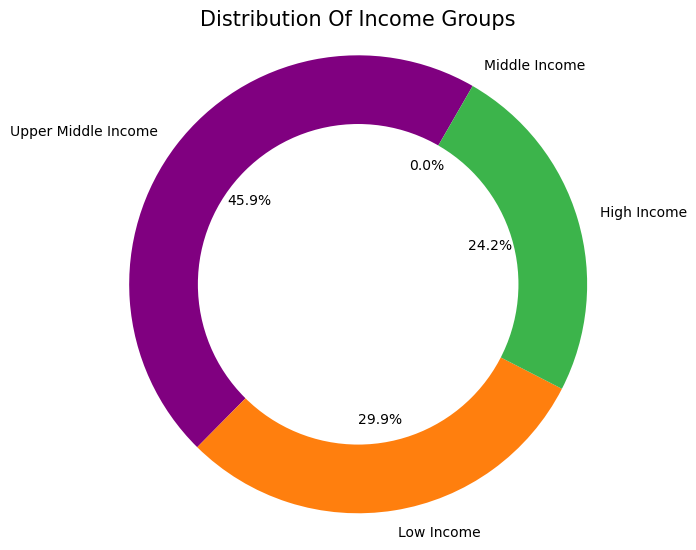

In [27]:
data_income =df['Income_Group'].value_counts()

custom_colors = ['#800080', '#ff7f0e', '#3cb44b', '#d62728']

plt.figure(figsize=(6.5, 6.5))
plt.pie(data_income, labels=data_income.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)
plt.title('Distribution Of Income Groups',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) 
plt.axis('equal')  
plt.show()

In [28]:
df['Balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Balance, dtype: float64

<Axes: xlabel='Balance', ylabel='Count'>

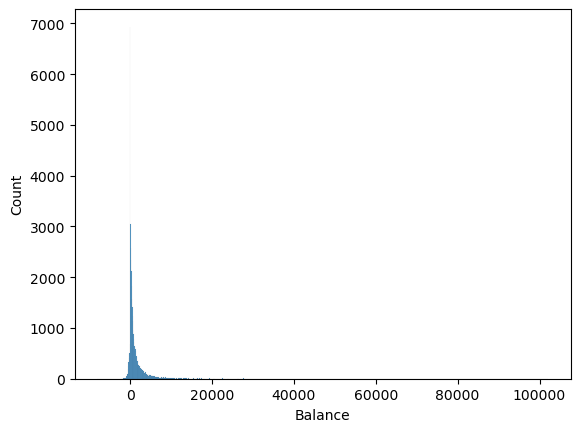

In [29]:
sns.histplot(x = df["Balance"])

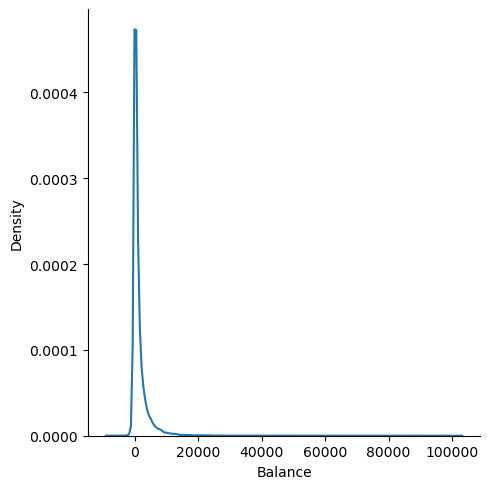

In [55]:
sns.displot(data =df,x = "Balance",kind ="kde")

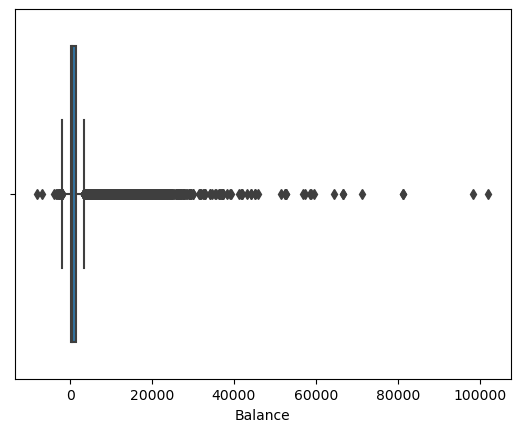

<Figure size 500x500 with 0 Axes>

In [30]:
sns.boxplot(x=df.Balance)
plt.figure(figsize = [5,5])
plt.show()

In [31]:
df.Balance.quantile([0.5, 0.75, 0.90,0.95,0.99])

0.50      448.0
0.75     1428.0
0.90     3574.0
0.95     5768.0
0.99    13164.9
Name: Balance, dtype: float64

In [32]:
df[df['Balance']>13000].describe()

,Age,Salary,Balance,Contact_Day,No_Of_Campaign,Pdays,Previous_Campaign
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,44.654008,68052.742616,21566.381857,16.035865,2.751055,31.635021,0.531646
std,11.875255,34446.750321,11411.890776,7.990268,3.089443,86.211818,1.725340
min,23.000000,0.000000,13014.000000,1.000000,1.000000,-1.000000,0.000000
25%,34.000000,50000.000000,14892.250000,10.000000,1.000000,-1.000000,0.000000
50%,43.000000,60000.000000,17924.000000,18.000000,2.000000,-1.000000,0.000000
75%,54.000000,100000.000000,23537.750000,21.000000,3.000000,-1.000000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


In [ ]:
## Balance>13000 people are of higher salary range.

<Axes: xlabel='Contact_Day', ylabel='Count'>

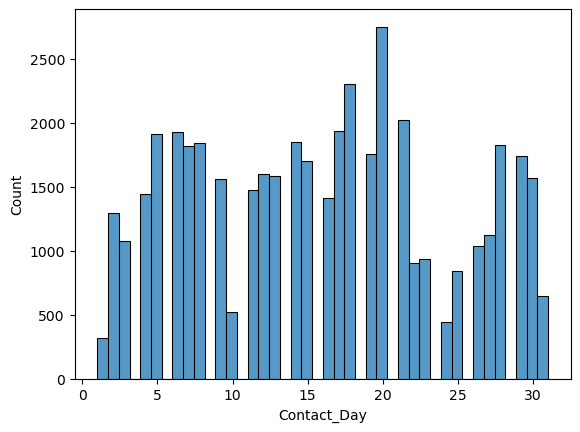

In [33]:
sns.histplot(x = df['Contact_Day'])

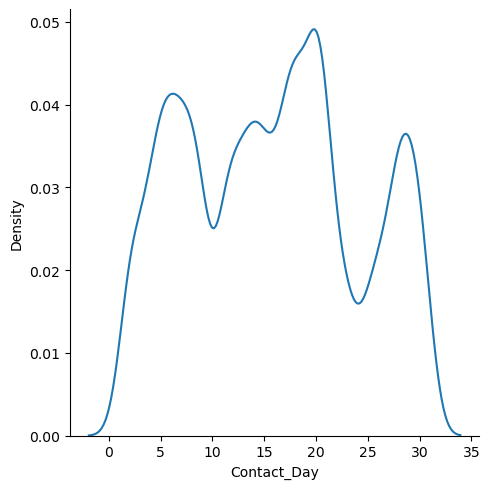

In [37]:
sns.displot(data =df,x = "Contact_Day",kind ="kde")

<Axes: xlabel='No_Of_Campaign', ylabel='Count'>

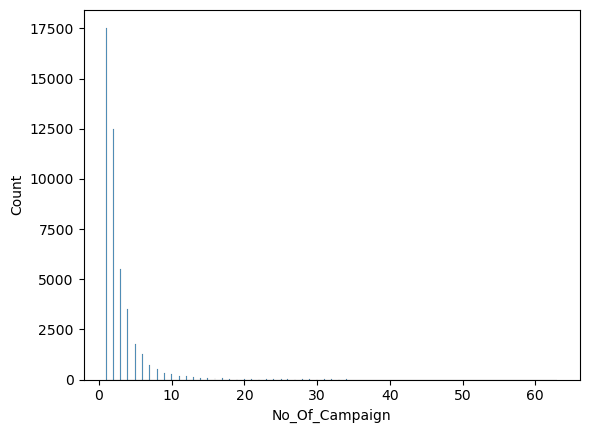

In [38]:
sns.histplot(x = df['No_Of_Campaign'])

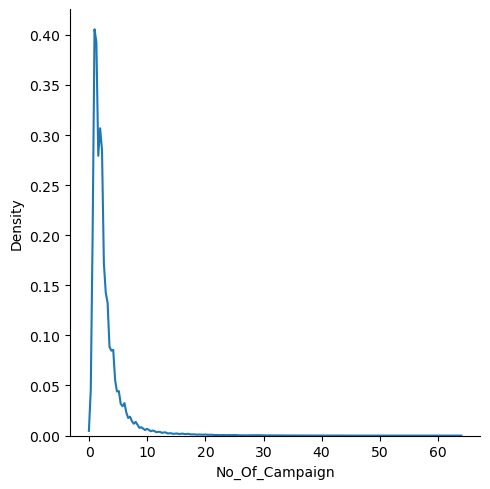

In [39]:
sns.displot(data =df,x = "No_Of_Campaign",kind ="kde")

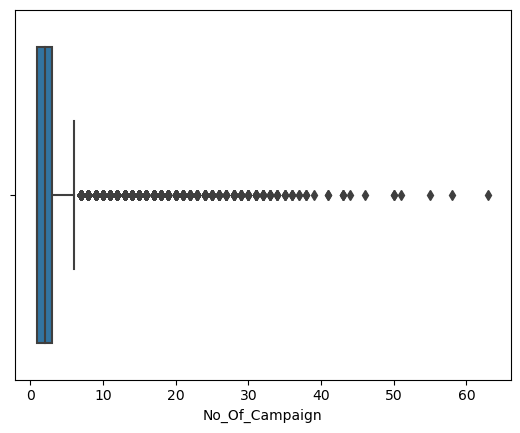

<Figure size 500x500 with 0 Axes>

In [40]:
sns.boxplot(x=df.No_Of_Campaign)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='Pdays', ylabel='Count'>

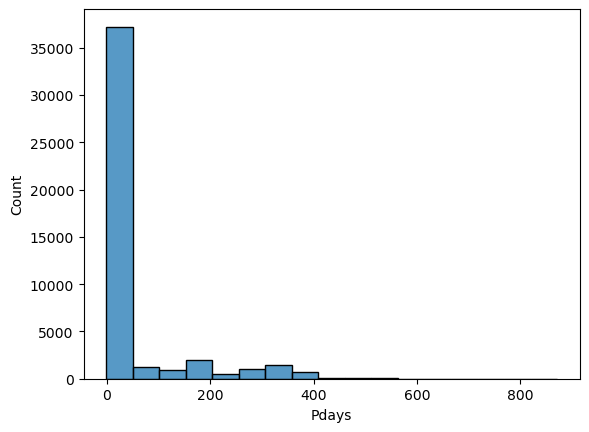

In [41]:
sns.histplot(x = df['Pdays'])

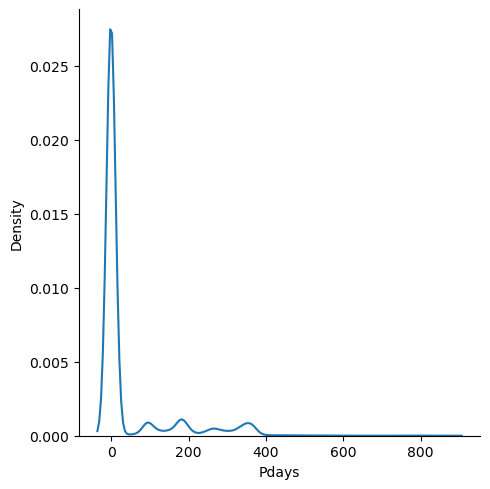

In [42]:
sns.displot(data =df,x = "Pdays",kind ="kde")

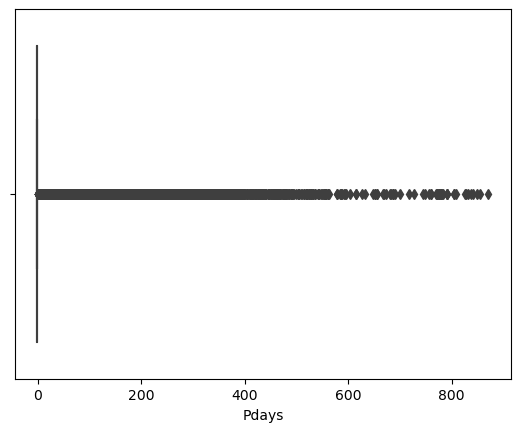

<Figure size 500x500 with 0 Axes>

In [43]:
sns.boxplot(x=df.Pdays)
plt.figure(figsize = [5,5])
plt.show()

In [44]:
df['Call_Duration'].describe()

count       45211
unique       2646
top       1.5 min
freq          138
Name: Call_Duration, dtype: object

<Axes: xlabel='Call_Duration', ylabel='Count'>

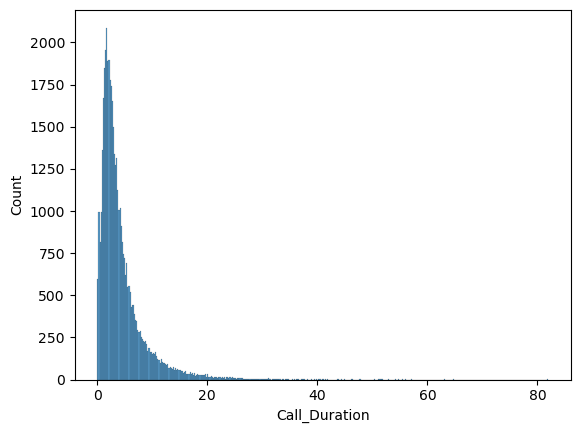

In [48]:
sns.histplot(x = df['Call_Duration'])

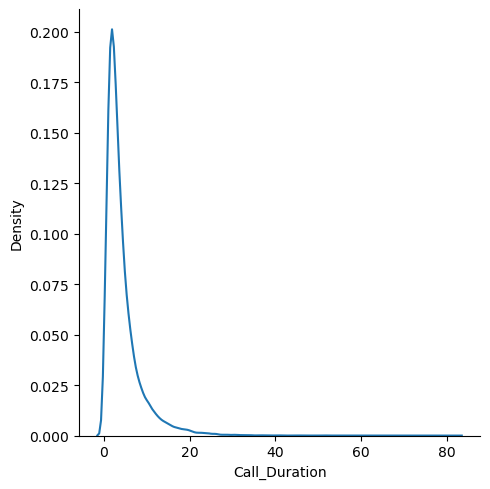

In [49]:
sns.displot(data =df,x = "Call_Duration",kind ="kde")

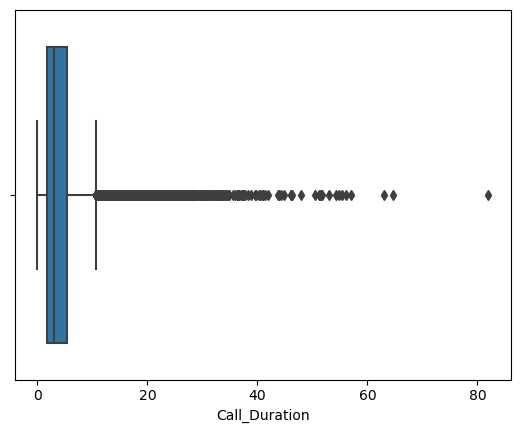

<Figure size 500x500 with 0 Axes>

In [50]:
sns.boxplot(x=df.Call_Duration)
plt.figure(figsize = [5,5])
plt.show()

In [51]:
df['Age'].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

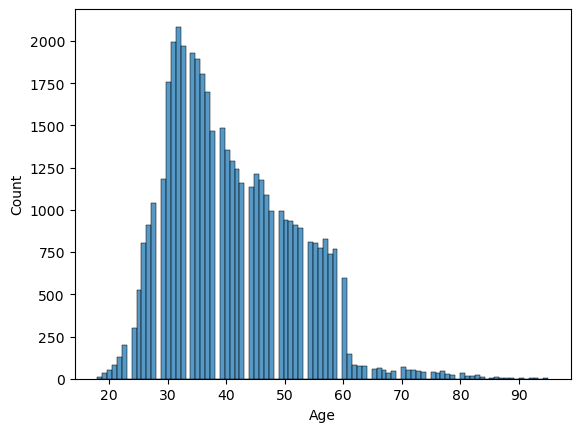

In [52]:
sns.histplot(x = df['Age'])

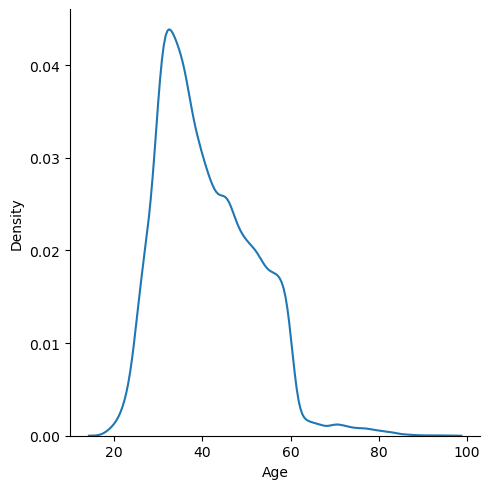

In [53]:
sns.displot(data =df,x = "Age",kind ="kde")

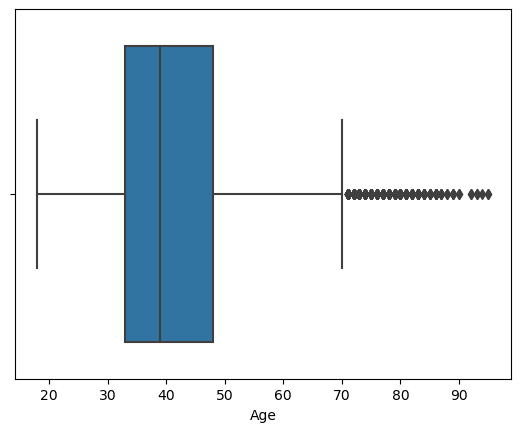

<Figure size 500x500 with 0 Axes>

In [54]:
sns.boxplot(x=df.Age)
plt.figure(figsize = [5,5])
plt.show()

In [55]:
df['Age'][df['Age']>70].count() ## Only 487 people are above 70+ age.

487

In [91]:
## MISSING VALUES IMPUTATION

In [92]:
df.isna().sum()

Customer_id            0
Age                   20
Salary                 0
Balance                0
Marital_Status         0
Job_Education          0
Targeted_Customer      0
Default_Loan           0
Housing_loan           0
Other_loan             0
Contact_Type           0
Contact_Day            0
Contact_Month_Year    50
Call_Duration          0
No_Of_Campaign         0
Pdays                  0
Previous_Campaign      0
P_Outcome              0
Response              30
dtype: int64

In [56]:
df['Age'].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64

In [7]:
# Percentage of Age is na

round((df['Age'].isna().sum()/len(df["Age"]))*100,3)

0.044

In [57]:
# filling missing values with mean
df['Age'] =df['Age'].fillna(df['Age'].median())

In [58]:
bins = [30,45,60,70,100]  

# Define labels for the groups
group_labels = ['Young_Adult','Early_Middle_Aged','Mid_Aged','Senior_Citizen']

# Create a new column 'Age_Group' based on the bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=group_labels)

df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education,Income_Group,Age_Group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,-1,0,unknown,no,management,tertiary,High Income,Early_Middle_Aged
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,-1,0,unknown,no,technician,secondary,Upper Middle Income,Young_Adult
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,-1,0,unknown,no,entrepreneur,secondary,High Income,Young_Adult
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,-1,0,unknown,no,blue-collar,unknown,Low Income,Early_Middle_Aged
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,-1,0,unknown,no,unknown,unknown,Low Income,Young_Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.283333,3,-1,0,unknown,yes,technician,tertiary,Upper Middle Income,Early_Middle_Aged
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.600000,2,-1,0,unknown,yes,retired,primary,Upper Middle Income,Senior_Citizen
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.783333,5,184,3,success,yes,retired,secondary,Upper Middle Income,Senior_Citizen
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.466667,4,-1,0,unknown,no,blue-collar,secondary,Low Income,Early_Middle_Aged


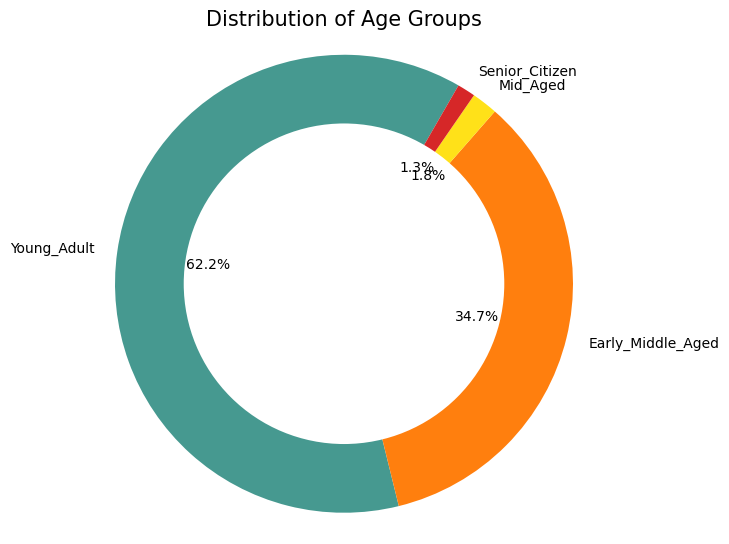

In [59]:
data_age =df['Age_Group'].value_counts()

custom_colors = ['#469990', '#ff7f0e', '#ffe119', '#d62728']

plt.figure(figsize=(6.5, 6.5))
plt.pie(data_age, labels=data_age.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)
plt.title('Distribution of Age Groups',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create the donut shape
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [60]:
df['Pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: Pdays, dtype: float64

In [10]:
df['Response'].value_counts()

no     39894
yes     5287
Name: Response, dtype: int64

In [61]:
df.Pdays = df.Pdays.replace(-1,np.NaN)  #All values of -1 are replaced.
df['Pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: Pdays, dtype: float64

In [62]:
df['Contact_Month_Year'].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: Contact_Month_Year, dtype: int64

In [63]:
df["Contact_Month_Year"]= df["Contact_Month_Year"].fillna(df['Contact_Month_Year'].mode()[0])
df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education,Income_Group,Age_Group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary,High Income,Early_Middle_Aged
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary,Upper Middle Income,Young_Adult
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,High Income,Young_Adult
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown,Low Income,Early_Middle_Aged
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown,Low Income,Young_Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.283333,3,NaN,0,unknown,yes,technician,tertiary,Upper Middle Income,Early_Middle_Aged
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.600000,2,NaN,0,unknown,yes,retired,primary,Upper Middle Income,Senior_Citizen
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.783333,5,184.0,3,success,yes,retired,secondary,Upper Middle Income,Senior_Citizen
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.466667,4,NaN,0,unknown,no,blue-collar,secondary,Low Income,Early_Middle_Aged


In [99]:

df['Response'].value_counts()

no     39894
yes     5287
Name: Response, dtype: int64

In [100]:
# percentage of response not available

round((df['Response'].isna().sum()/len(df["Response"]))*100,2)

0.07

In [64]:
## Since Response is a Target Variable so if imputed will nt give right result. So it is removed.
df=df[~df.Response.isna()]
df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education,Income_Group,Age_Group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary,High Income,Early_Middle_Aged
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary,Upper Middle Income,Young_Adult
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,High Income,Young_Adult
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown,Low Income,Early_Middle_Aged
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown,Low Income,Young_Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.283333,3,NaN,0,unknown,yes,technician,tertiary,Upper Middle Income,Early_Middle_Aged
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.600000,2,NaN,0,unknown,yes,retired,primary,Upper Middle Income,Senior_Citizen
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.783333,5,184.0,3,success,yes,retired,secondary,Upper Middle Income,Senior_Citizen
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.466667,4,NaN,0,unknown,no,blue-collar,secondary,Low Income,Early_Middle_Aged


In [ ]:
# UNIVARIATE ANALYSIS

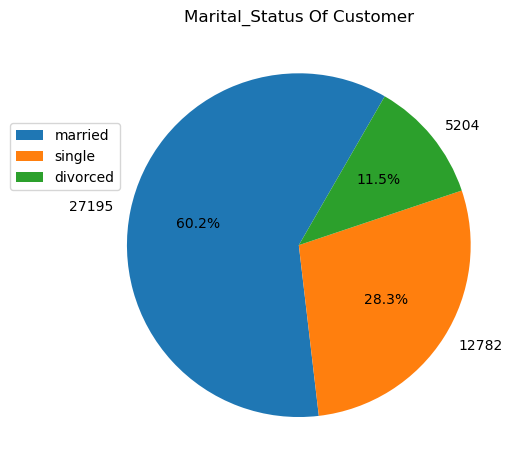

In [65]:
labels = df['Marital_Status'].dropna().unique()
actual_values = df['Marital_Status'].value_counts(dropna=True)
plt.pie(df['Marital_Status'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Marital_Status Of Customer', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout()
plt.show()


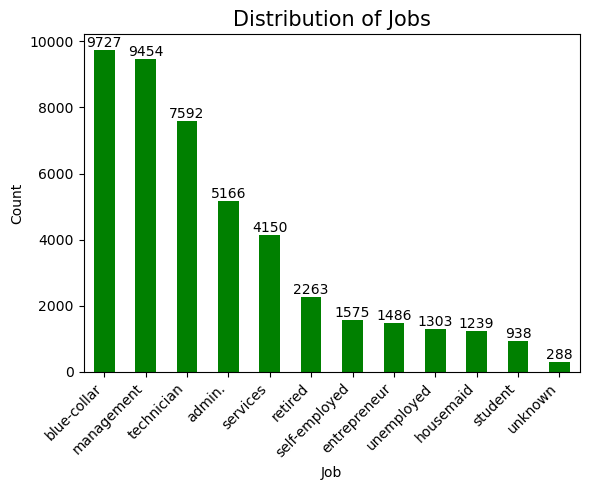

In [66]:
job_counts = df['Job'].value_counts()

plt.figure(figsize=(6,5))
job_counts.plot(kind='bar', color='g')
plt.title('Distribution of Jobs',fontsize =15)
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

for i, count in enumerate(job_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

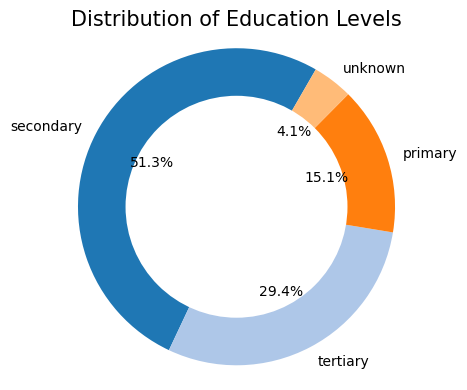

In [67]:
data_edu =df['Education'].value_counts()

plt.figure(figsize=(4.5, 4.5))
plt.pie(data_edu, labels=data_edu.index, autopct='%1.1f%%', startangle=60, colors=plt.cm.tab20.colors)
plt.title('Distribution of Education Levels',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create the donut shape
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

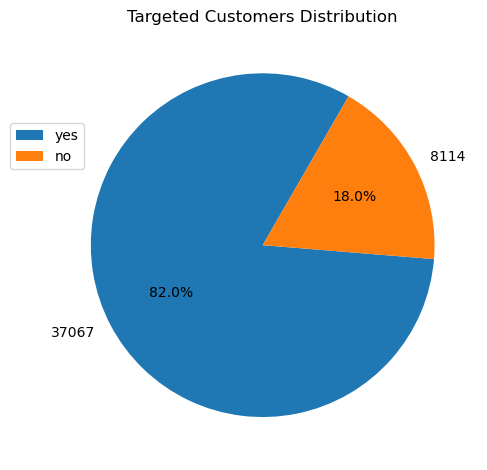

In [68]:
labels = df['Targeted_Customer'].dropna().unique()
actual_values = df['Targeted_Customer'].value_counts(dropna=True)
plt.pie(df['Targeted_Customer'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Targeted Customers Distribution', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout()
plt.show()

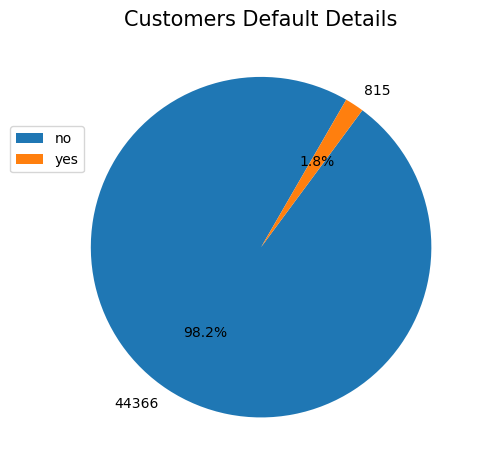

In [69]:
labels = df['Default_Loan'].dropna().unique()
actual_values = df['Default_Loan'].value_counts(dropna=True)
plt.pie(df['Default_Loan'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Customers Default Details', fontsize=15)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout()
plt.show()

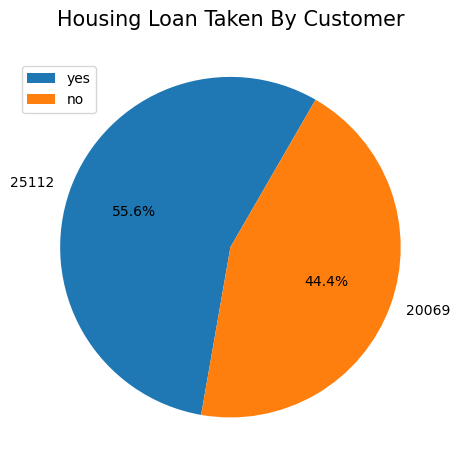

In [70]:
labels = df['Housing_loan'].dropna().unique()
actual_values = df['Housing_loan'].value_counts(dropna=True)
plt.pie(df['Housing_loan'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Housing Loan Taken By Customer', fontsize=15)
plt.legend(labels, bbox_to_anchor = (0.2, 0.8))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

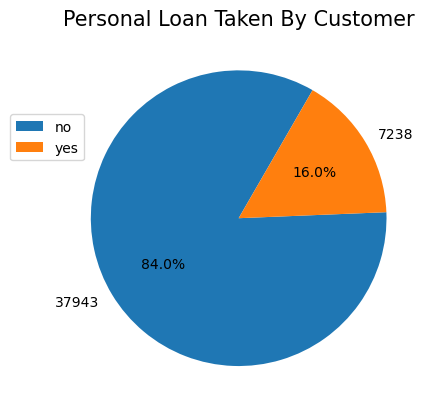

In [71]:
labels = df['Other_loan'].dropna().unique()
actual_values = df['Other_loan'].value_counts(dropna=True)
plt.pie(df['Other_loan'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Personal Loan Taken By Customer', fontsize=15)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

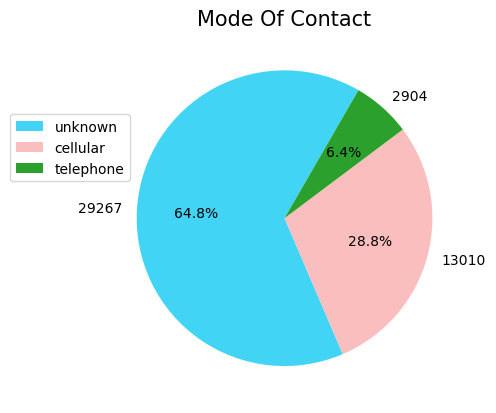

In [72]:
labels = df['Contact_Type'].dropna().unique()

custom_colors = ['#42d4f4', '#fabebe', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

actual_values = df['Contact_Type'].value_counts(dropna=True)
plt.pie(df['Contact_Type'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60,colors = custom_colors)

#labeling
plt.title('Mode Of Contact', fontsize=15)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout

Text(0.5, 1.0, 'Outcome of Previous Contact')

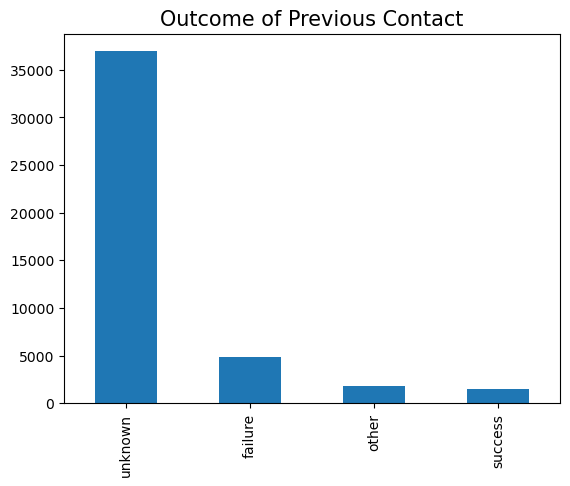

In [75]:

df['P_Outcome'].value_counts().plot.bar()
plt.title('Outcome of Previous Contact',fontsize =15)

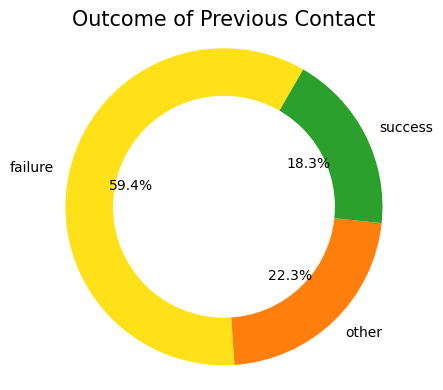

In [76]:
data_out =df['P_Outcome'][~(df['P_Outcome']=='unknown')].value_counts()

custom_colors = ['#ffe119', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(4.5, 4.5))
plt.pie(data_out, labels=data_out.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)
plt.title('Outcome of Previous Contact',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create the donut shape
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

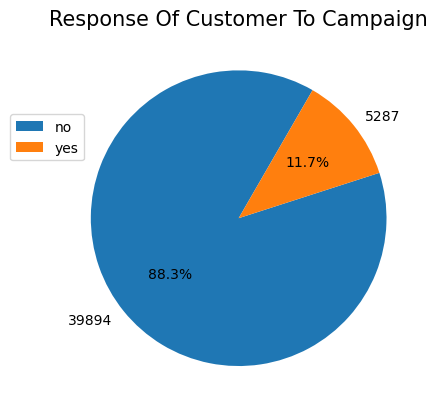

In [77]:
labels = df['Response'].dropna().unique()
actual_values = df['Response'].value_counts(dropna=True)
plt.pie(df['Response'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Response Of Customer To Campaign', fontsize=15)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout

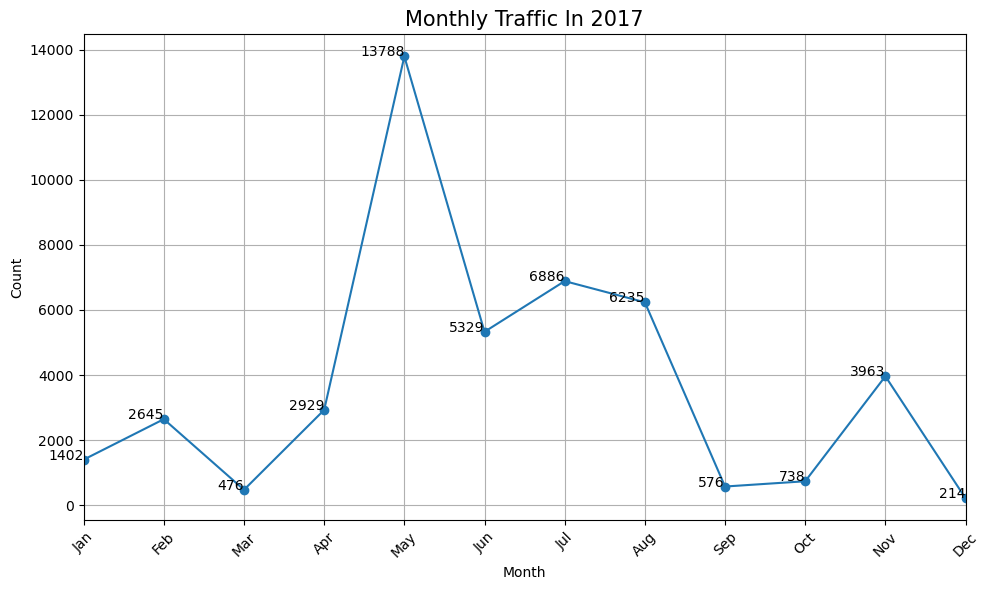

In [78]:

df['Contact_Month_Year'] = pd.to_datetime(df['Contact_Month_Year'], format='%b, %Y')

monthly_counts = df['Contact_Month_Year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
monthly_counts.plot(marker='o', linestyle='-')
plt.title('Monthly Traffic In 2017',fontsize= 15)
plt.xlabel('Month')
plt.ylabel('Count')

plt.grid(True)

for i, count in enumerate(monthly_counts.values):
    plt.text(monthly_counts.index[i], count, str(count), ha='right')

plt.xticks(monthly_counts.index, [month.strftime('%b') for month in monthly_counts.index], rotation=45)    
plt.tight_layout()
plt.show()

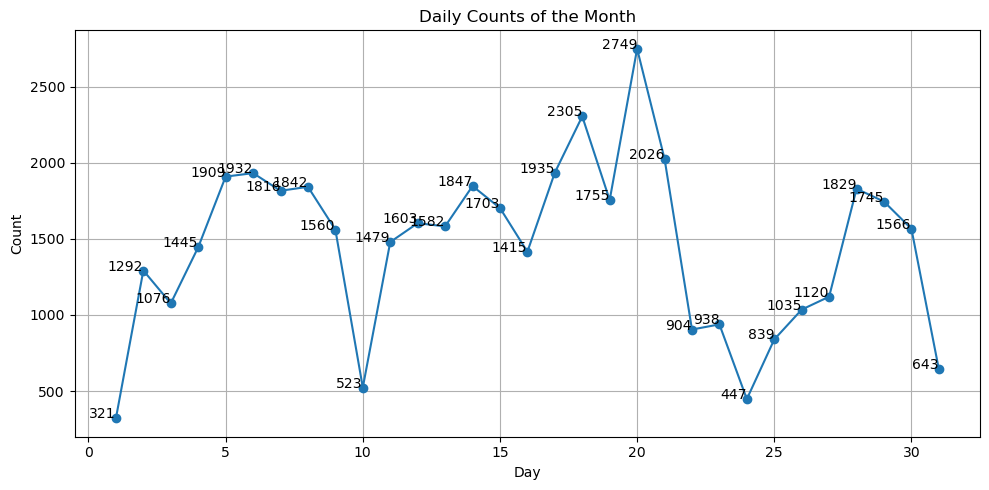

In [79]:
daily_counts = df['Contact_Day'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title('Daily Counts of the Month')
plt.xlabel('Day')
plt.ylabel('Count')
plt.grid(True)

for i, count in enumerate(daily_counts.values):
    plt.text(daily_counts.index[i], count, str(count), ha='right')

plt.tight_layout()
plt.show()

In [80]:
df['Contact_Day'].value_counts().mean() ### 

1457.4516129032259

In [81]:
df['Call_Duration'].describe()

count    45181.000000
mean         4.302462
std          4.292520
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: Call_Duration, dtype: float64

In [82]:
bins = [0,5,10,20,30]
        
        # Define labels for the categories
labels = ['Normal Calls', 'Medium Calls', 'Long Calls', 'Very Long Calls']

# Create a new column with the categories
df['Call_Category'] = pd.cut(df['Call_Duration'], bins=bins, labels=labels)
df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education,Income_Group,Age_Group,Call_Category
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,2017-05-01,4.350000,1,NaN,0,unknown,no,management,tertiary,High Income,Early_Middle_Aged,Normal Calls
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,2017-05-01,2.516667,1,NaN,0,unknown,no,technician,secondary,Upper Middle Income,Young_Adult,Normal Calls
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,2017-05-01,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,High Income,Young_Adult,Normal Calls
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,2017-05-01,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,Low Income,Early_Middle_Aged,Normal Calls
4,33.0,0,1,single,no,no,no,no,unknown,5,2017-05-01,3.300000,1,NaN,0,unknown,no,unknown,unknown,Low Income,Young_Adult,Normal Calls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,2017-11-01,16.283333,3,NaN,0,unknown,yes,technician,tertiary,Upper Middle Income,Early_Middle_Aged,Long Calls
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,2017-11-01,7.600000,2,NaN,0,unknown,yes,retired,primary,Upper Middle Income,Senior_Citizen,Medium Calls
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,2017-11-01,18.783333,5,184.0,3,success,yes,retired,secondary,Upper Middle Income,Senior_Citizen,Long Calls
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,2017-11-01,8.466667,4,NaN,0,unknown,no,blue-collar,secondary,Low Income,Early_Middle_Aged,Medium Calls


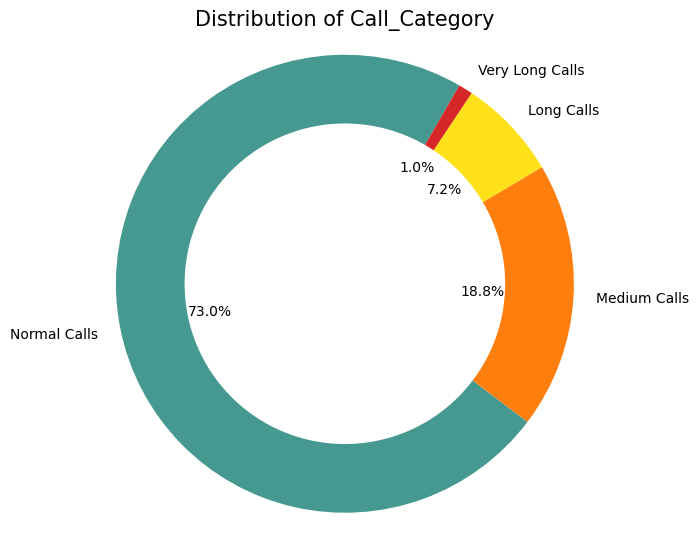

In [83]:
data_duration =df['Call_Category'].value_counts()

custom_colors = ['#469990', '#ff7f0e', '#ffe119', '#d62728', '#9467bd']

plt.figure(figsize=(6.5, 6.5))
plt.pie(data_duration, labels=data_duration.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)
plt.title('Distribution of Call_Category',fontsize =15)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create the donut shape
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
##BIVARIATE ANALYSIS

<Axes: xlabel='Salary', ylabel='Balance'>

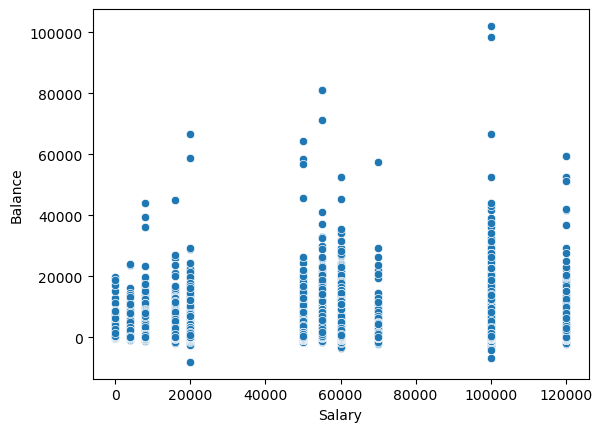

In [84]:
sns.scatterplot(df,x='Salary',y ='Balance')

<Axes: xlabel='Age', ylabel='Balance'>

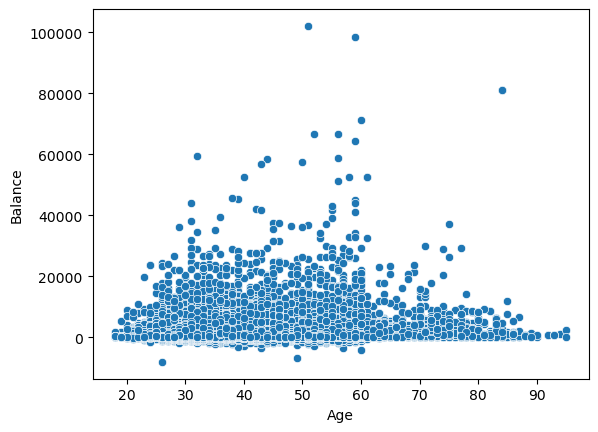

In [85]:
sns.scatterplot(df,x='Age',y ='Balance')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

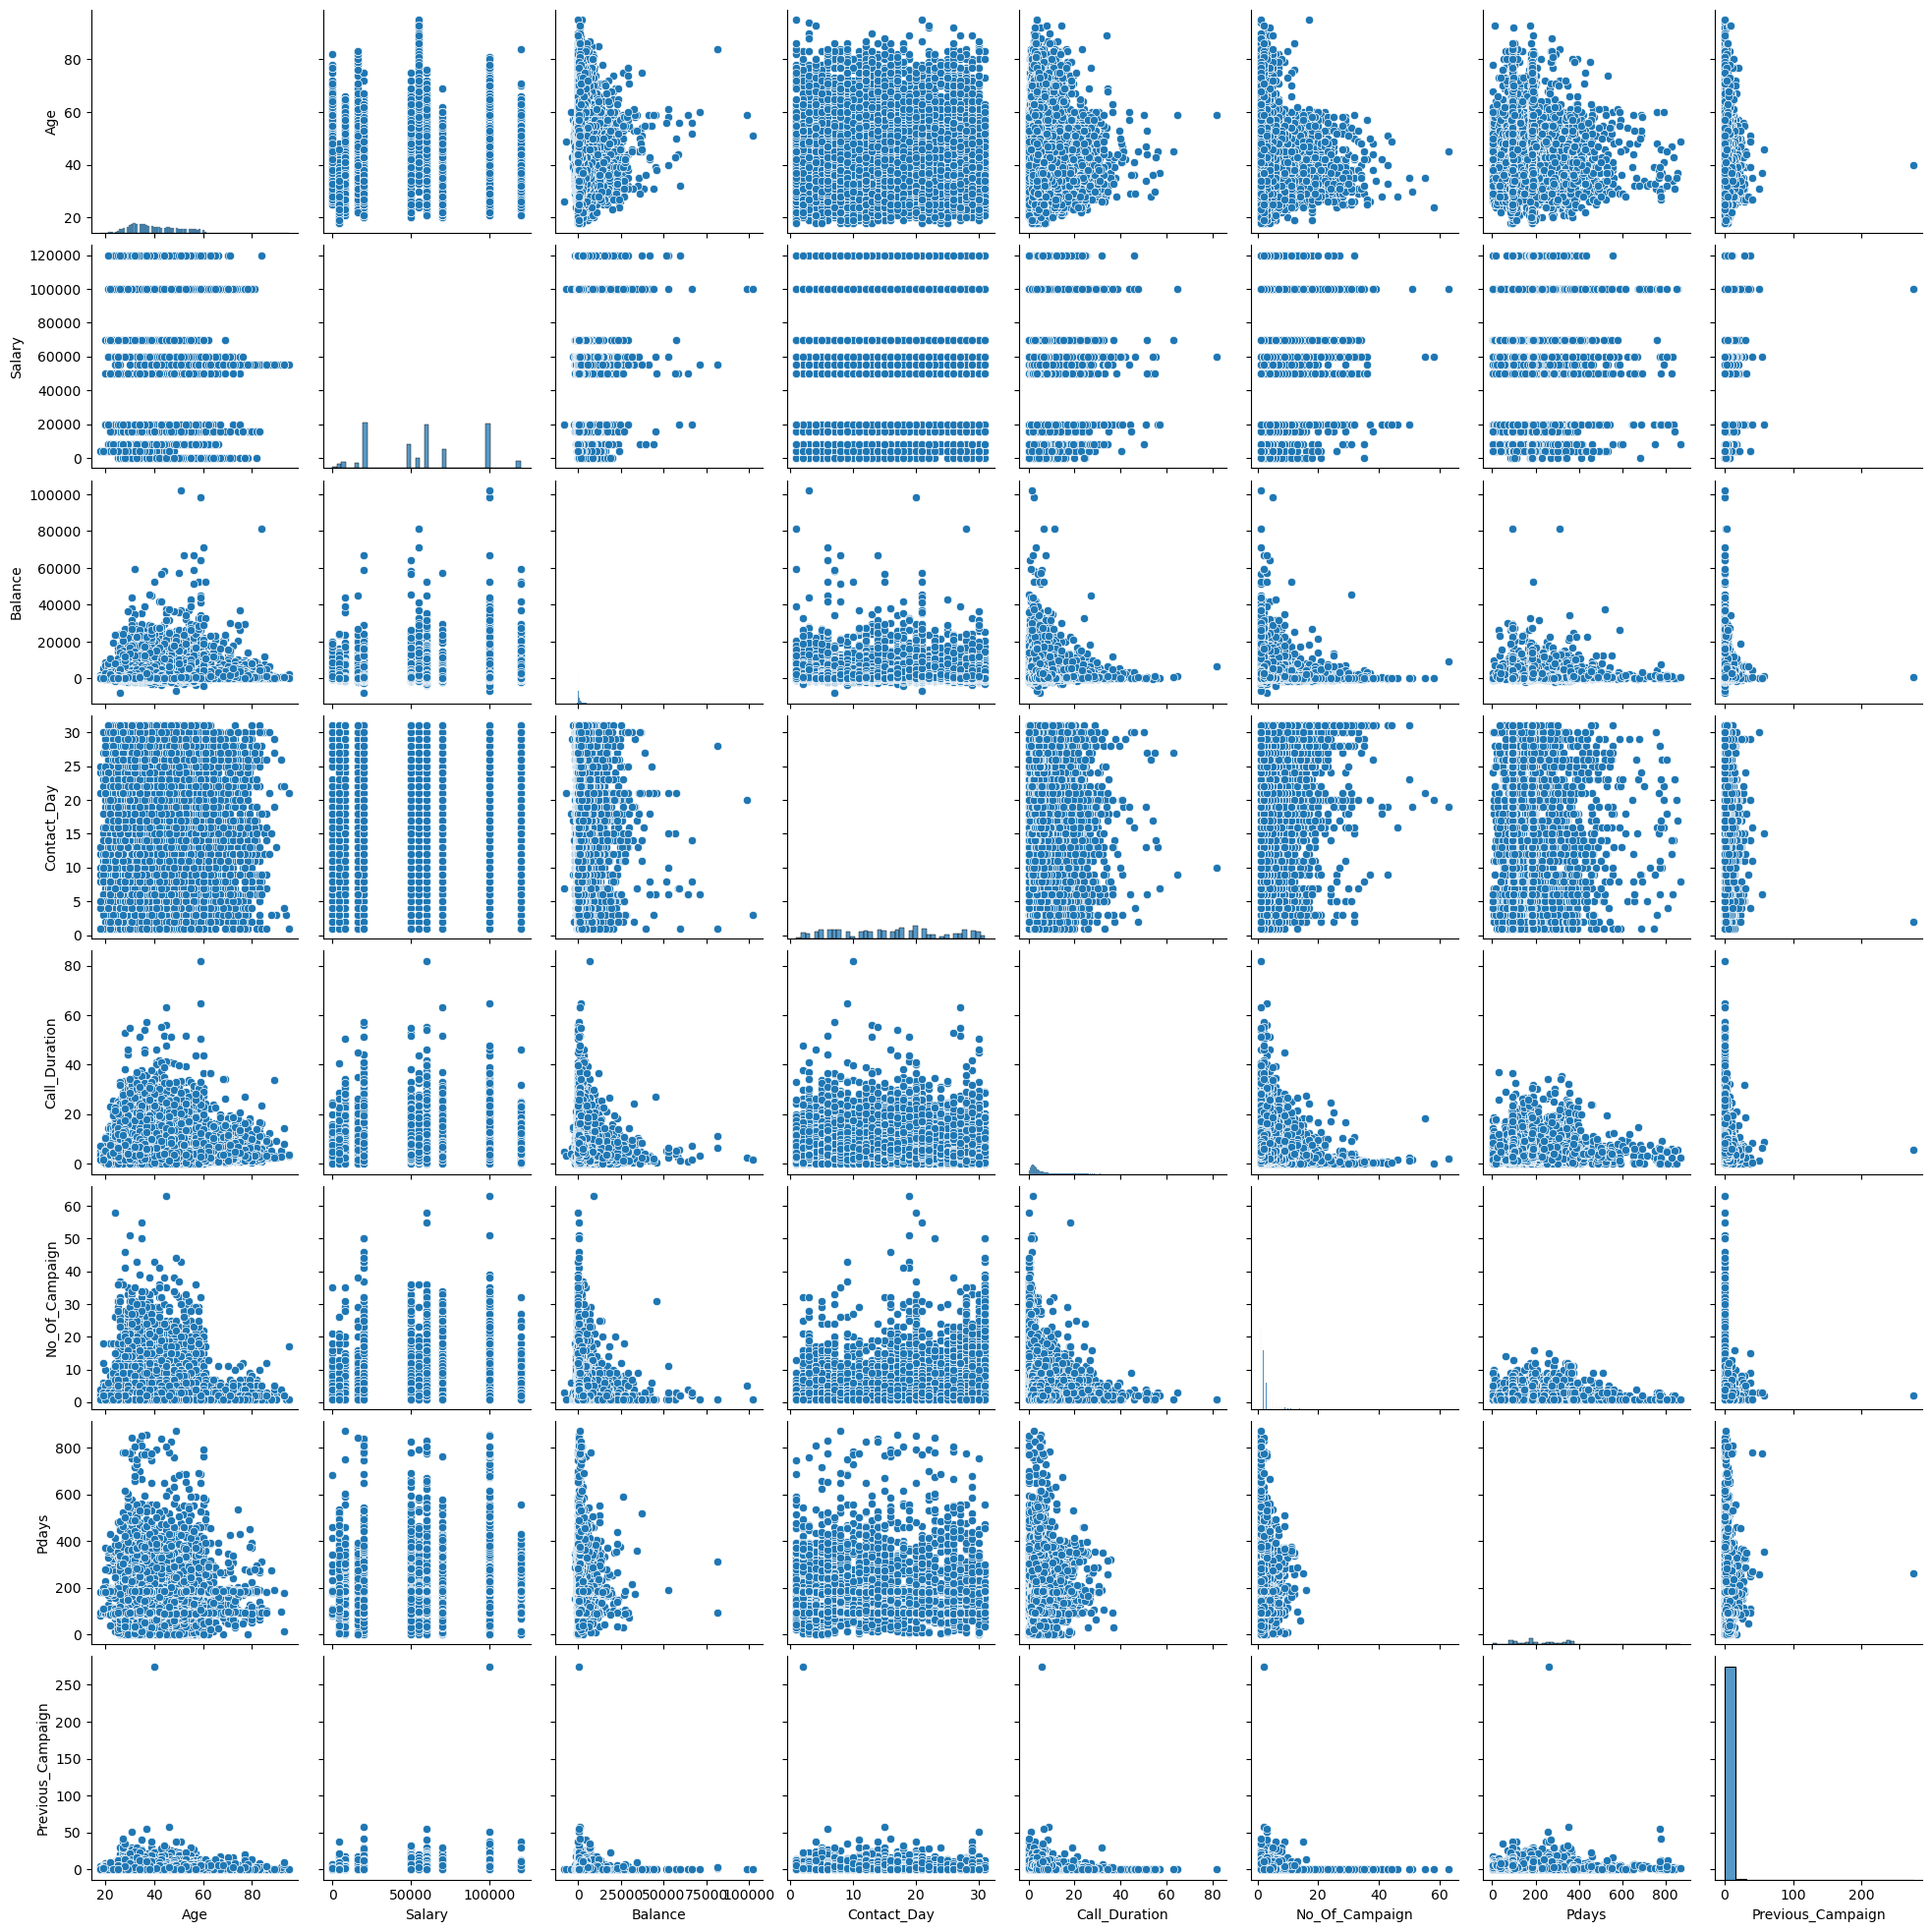

In [86]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show

In [87]:
cor = (df[["Salary","Balance","Age"]]).corr()
cor

,Salary,Balance,Age
Salary,1.000000,0.055453,0.024505
Balance,0.055453,1.000000,0.097709
Age,0.024505,0.097709,1.000000


<Axes: >

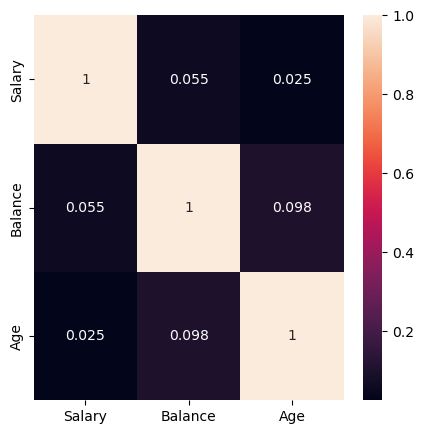

In [88]:
plt.figure(figsize= (5,5))
sns.heatmap(cor,annot =True)

In [89]:
cor1 = (df[["Pdays",'No_Of_Campaign','Previous_Campaign']]).corr()
cor1

,Pdays,No_Of_Campaign,Previous_Campaign
Pdays,1.000000,0.050195,-0.021931
No_Of_Campaign,0.050195,1.000000,-0.032776
Previous_Campaign,-0.021931,-0.032776,1.000000


<Axes: >

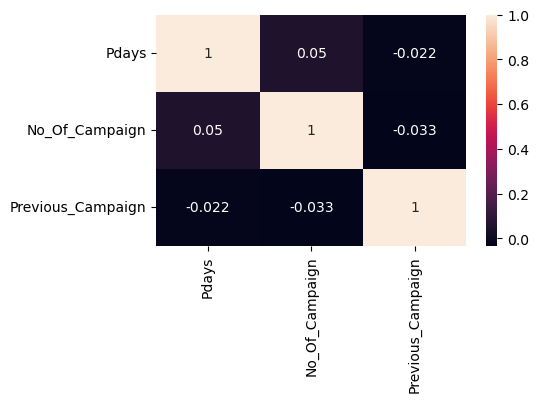

In [90]:
plt.figure(figsize= (5,3))
sns.heatmap(cor1,annot =True)
## correlation between pdays & previous campaign can be seen.

In [91]:
df.groupby('Response')['Salary'].mean()

Response
no     56770.917933
yes    58771.704180
Name: Salary, dtype: float64

In [92]:
df.groupby('Response')['Salary'].median()

Response
no     60000.0
yes    60000.0
Name: Salary, dtype: float64

<Axes: xlabel='Response', ylabel='Salary'>

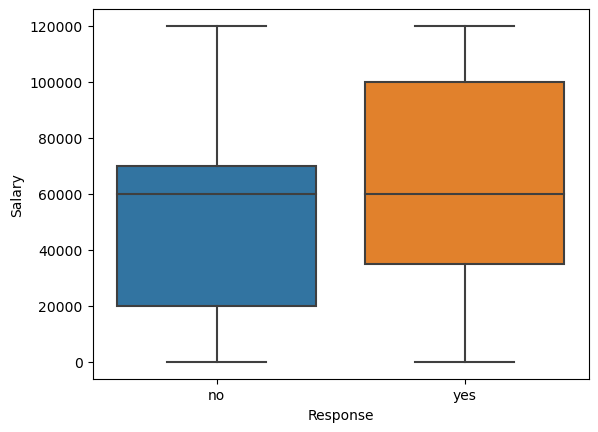

In [93]:
sns.boxplot(df,y="Salary",x="Response")

In [ ]:
#The interquartile range for customers who gave a positive response is on the higher salary side i.e salary above 60000.
#This is actually true, because people who have higher salaries are more likely to invest in term deposits

In [94]:
df.groupby('Response')['Balance'].mean()

Response
no     1304.094525
yes    1804.832041
Name: Balance, dtype: float64

In [95]:
df.groupby('Response')['Balance'].median()

Response
no     417.0
yes    733.0
Name: Balance, dtype: float64

<Axes: xlabel='Response', ylabel='Balance'>

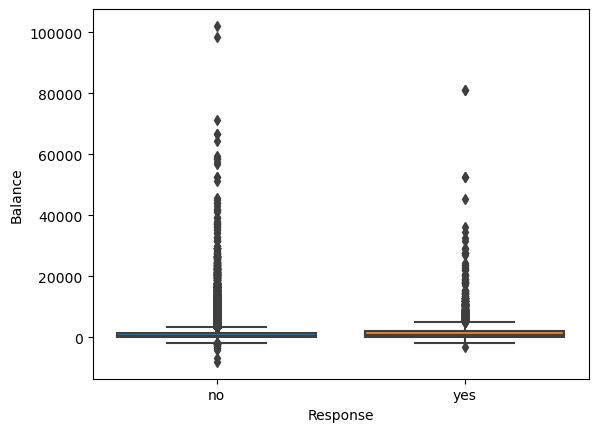

In [96]:
sns.boxplot(df,y="Balance",x="Response")

<Axes: xlabel='Response', ylabel='Pdays'>

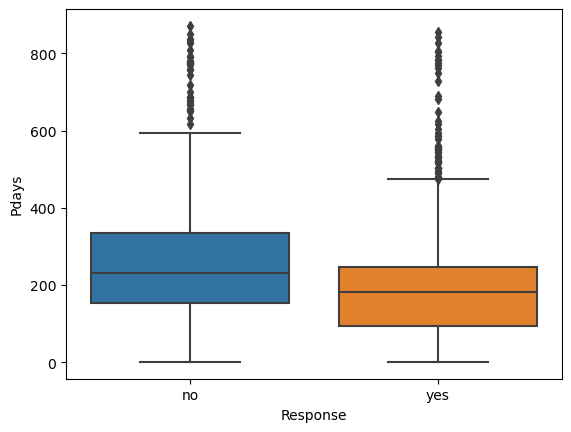

In [97]:
sns.boxplot(df,y="Pdays",x="Response")

In [98]:
df.groupby('Response')['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
no,39894.0,1304.094525,2975.033811,-8019.0,58.0,417.0,1345.0,102127.0
yes,5287.0,1804.832041,3501.645424,-3058.0,210.5,733.0,2159.5,81204.0


<Axes: xlabel='Education', ylabel='Salary'>

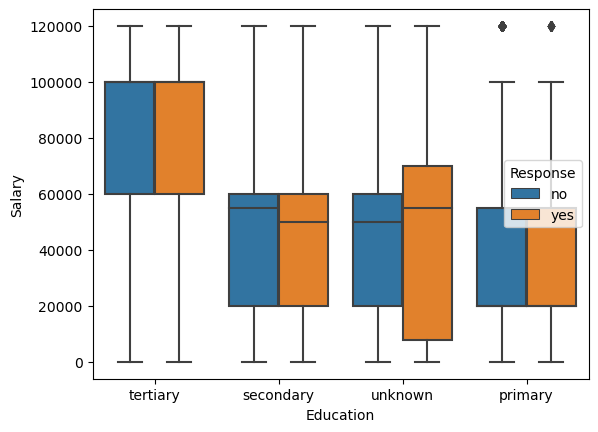

In [99]:

sns.boxplot(df,y="Salary",x="Education",hue = 'Response')


In [100]:
df.groupby('Job')['Salary'].mean().sort_values(ascending=False)

Job
entrepreneur     120000.0
management       100000.0
services          70000.0
self-employed     60000.0
technician        60000.0
retired           55000.0
admin.            50000.0
blue-collar       20000.0
housemaid         16000.0
unemployed         8000.0
student            4000.0
unknown               0.0
Name: Salary, dtype: float64

In [101]:
df['Response_Signal']=df['Response'].replace({'no':0,'yes':1})
df

,Age,Salary,Balance,Marital_Status,Targeted_Customer,Default_Loan,Housing_loan,Other_loan,Contact_Type,Contact_Day,Contact_Month_Year,Call_Duration,No_Of_Campaign,Pdays,Previous_Campaign,P_Outcome,Response,Job,Education,Income_Group,Age_Group,Call_Category,Response_Signal
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,2017-05-01,4.350000,1,NaN,0,unknown,no,management,tertiary,High Income,Early_Middle_Aged,Normal Calls,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,2017-05-01,2.516667,1,NaN,0,unknown,no,technician,secondary,Upper Middle Income,Young_Adult,Normal Calls,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,2017-05-01,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,High Income,Young_Adult,Normal Calls,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,2017-05-01,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,Low Income,Early_Middle_Aged,Normal Calls,0
4,33.0,0,1,single,no,no,no,no,unknown,5,2017-05-01,3.300000,1,NaN,0,unknown,no,unknown,unknown,Low Income,Young_Adult,Normal Calls,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,2017-11-01,16.283333,3,NaN,0,unknown,yes,technician,tertiary,Upper Middle Income,Early_Middle_Aged,Long Calls,1
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,2017-11-01,7.600000,2,NaN,0,unknown,yes,retired,primary,Upper Middle Income,Senior_Citizen,Medium Calls,1
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,2017-11-01,18.783333,5,184.0,3,success,yes,retired,secondary,Upper Middle Income,Senior_Citizen,Long Calls,1
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,2017-11-01,8.466667,4,NaN,0,unknown,no,blue-collar,secondary,Low Income,Early_Middle_Aged,Medium Calls,0


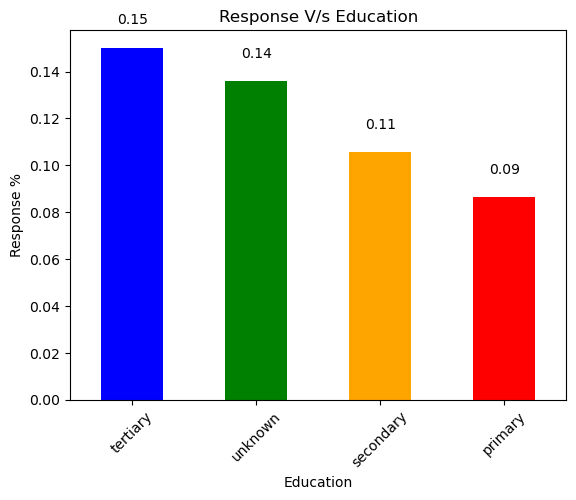

In [102]:

education_response = df.groupby('Education')['Response_Signal'].mean().sort_values(ascending=False)

education_response.plot.bar(color=['blue', 'green', 'orange', 'red', 'purple'])


plt.title('Response V/s Education')
plt.ylabel('Response %')
for i, v in enumerate(education_response):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

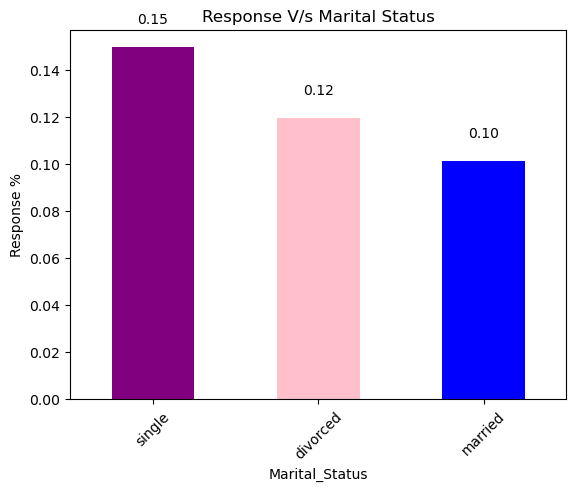

In [103]:
Marital_Response= df.groupby('Marital_Status')['Response_Signal'].mean().sort_values(ascending=False)

Marital_Response.plot.bar(color=['purple', 'pink', 'blue'])

plt.title('Response V/s Marital Status')
plt.ylabel('Response %')

for i, v in enumerate(Marital_Response):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()
     

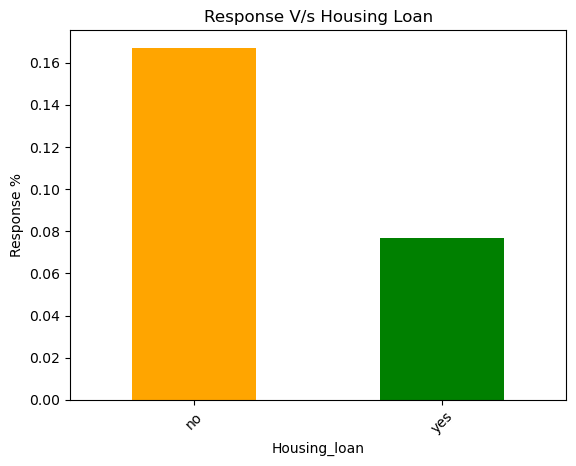

In [104]:
Housing_Response=df.groupby('Housing_loan')['Response_Signal'].mean().sort_values(ascending=False)

Housing_Response.plot.bar(color=['orange','green'])

plt.title('Response V/s Housing Loan')
plt.ylabel('Response %')

plt.xticks(rotation=45)
plt.show()

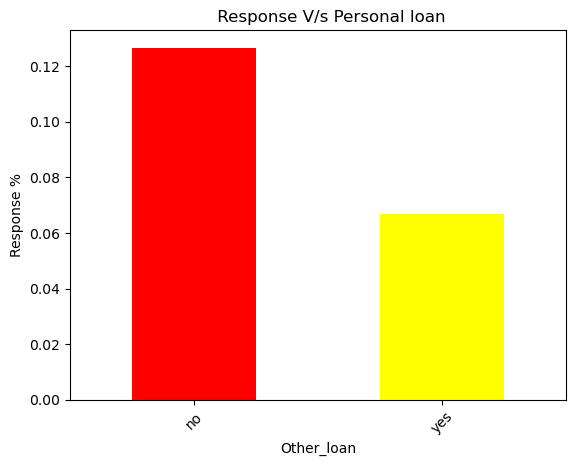

In [105]:
Otherloan_Response=df.groupby('Other_loan')['Response_Signal'].mean().sort_values(ascending=False)

Otherloan_Response.plot.bar(color=['red','yellow'])

plt.title('     Response V/s Personal loan')
plt.ylabel('Response %')

plt.xticks(rotation=45)
plt.show()

In [106]:
df.Age.describe()

count    45181.000000
mean        40.934906
std         10.616517
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64

In [107]:
df.groupby('Age_Group')['Response_Signal'].mean()

Age_Group
Young_Adult          0.098900
Early_Middle_Aged    0.097743
Mid_Aged             0.406295
Senior_Citizen       0.447639
Name: Response_Signal, dtype: float64

Text(0, 0.5, 'Response %')

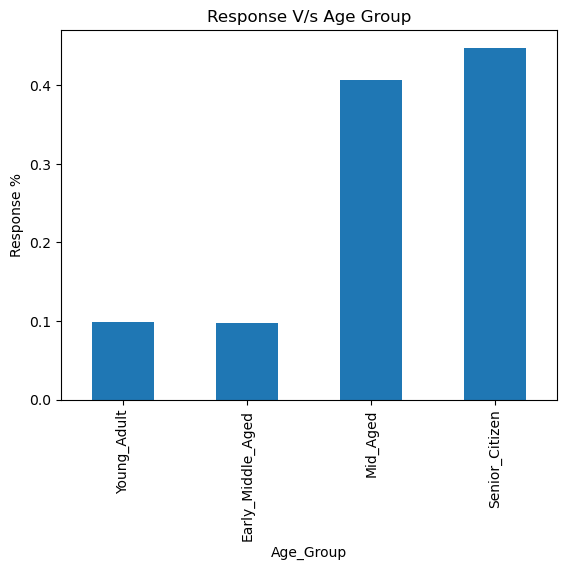

In [108]:

df.groupby('Age_Group')['Response_Signal'].mean().plot.bar()
plt.title('Response V/s Age Group')
plt.ylabel('Response %')

Text(0, 0.5, 'Response %')

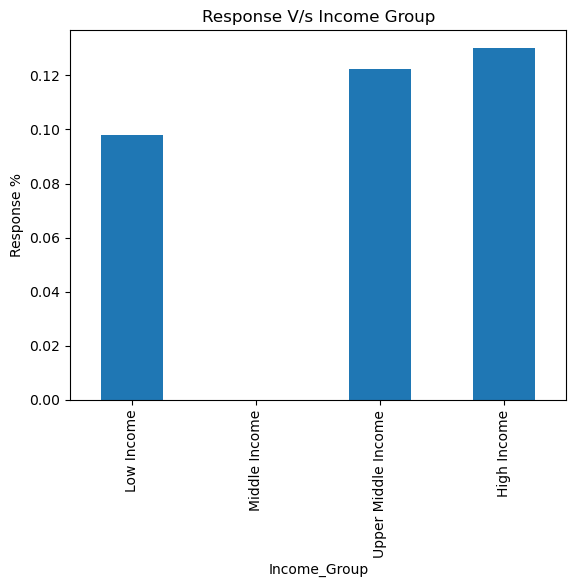

In [109]:

df.groupby('Income_Group')['Response_Signal'].mean().plot.bar()
plt.title('Response V/s Income Group')
plt.ylabel('Response %')

Text(0, 0.5, 'Response %')

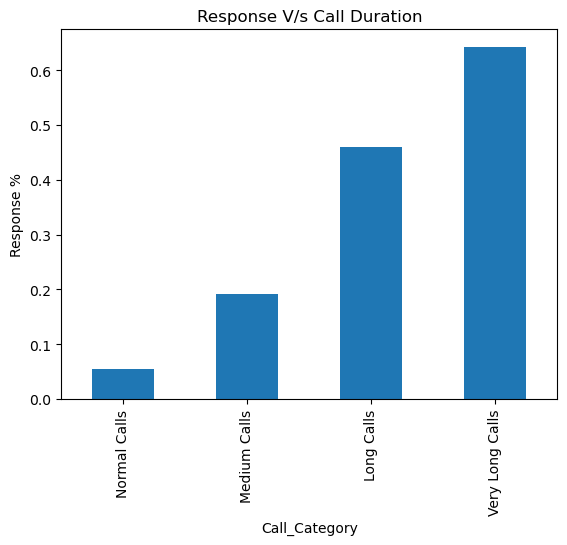

In [110]:

df.groupby('Call_Category')['Response_Signal'].mean().plot.bar()
plt.title('Response V/s Call Duration')
plt.ylabel('Response %')

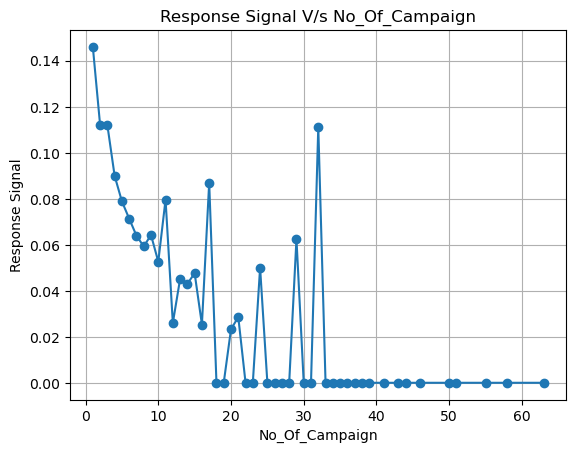

In [111]:
campaign_response = df.groupby('No_Of_Campaign')['Response_Signal'].mean()

# Plot the mean response signal using a line plot
campaign_response.plot(marker='o', linestyle='-')

plt.title('Response Signal V/s No_Of_Campaign')
plt.xlabel('No_Of_Campaign')
plt.ylabel('Response Signal')

plt.grid(True)
plt.show()

In [112]:

PT_Marital=pd.pivot_table(data=df,index='Education',columns='Marital_Status',values='Response_Signal')
PT_Marital

Marital_Status,divorced,married,single
Education,,,
primary,0.138482,0.075573,0.106682
secondary,0.103448,0.094681,0.129271
tertiary,0.138001,0.129798,0.183622
unknown,0.142012,0.122519,0.162879


<Axes: xlabel='Marital_Status', ylabel='Education'>

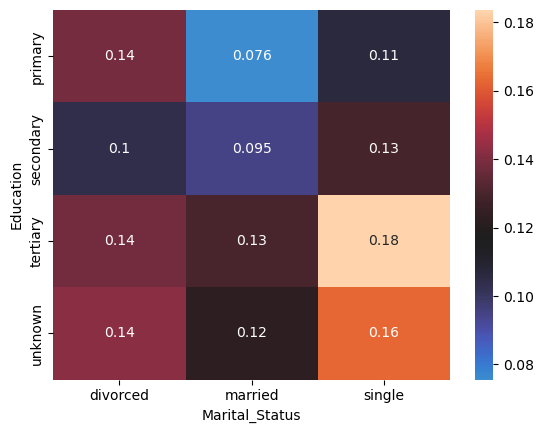

In [113]:

sns.heatmap(PT_Marital,annot=True,center=df['Response_Signal'].mean())

In [114]:

PT_Job_Marital=pd.pivot_table(data=df,index='Job',columns='Marital_Status',values='Response_Signal')
PT_Job_Marital

Marital_Status,divorced,married,single
Job,,,
admin.,0.120160,0.113383,0.136074
blue-collar,0.077437,0.062751,0.105760
entrepreneur,0.083799,0.075701,0.113924
housemaid,0.097826,0.073546,0.166667
management,0.127813,0.126205,0.162199
retired,0.285377,0.220682,0.120370
self-employed,0.157143,0.079637,0.191874
services,0.091075,0.074074,0.117696
student,0.166667,0.185185,0.293850


<Axes: xlabel='Marital_Status', ylabel='Job'>

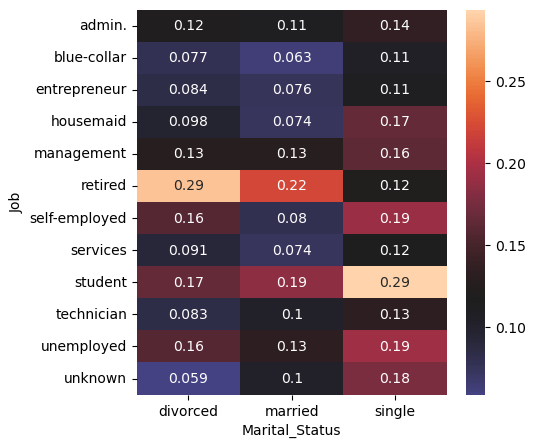

In [115]:

plt.figure(figsize=(5,5))
sns.heatmap(PT_Job_Marital,annot=True,center=df['Response_Signal'].mean())

In [116]:
PT_Job_contactmode=pd.pivot_table(data=df,index='Job',columns='Contact_Type',values='Response_Signal')
PT_Job_contactmode

Contact_Type,cellular,telephone,unknown
Job,,,
admin.,0.157612,0.142361,0.039921
blue-collar,0.099690,0.062295,0.039384
entrepreneur,0.093389,0.183908,0.040359
housemaid,0.112299,0.092715,0.032353
management,0.164411,0.127389,0.044297
retired,0.267348,0.318519,0.042945
self-employed,0.140741,0.122449,0.055416
services,0.121443,0.070175,0.035039
student,0.352941,0.191919,0.028169


<Axes: xlabel='Contact_Type', ylabel='Job'>

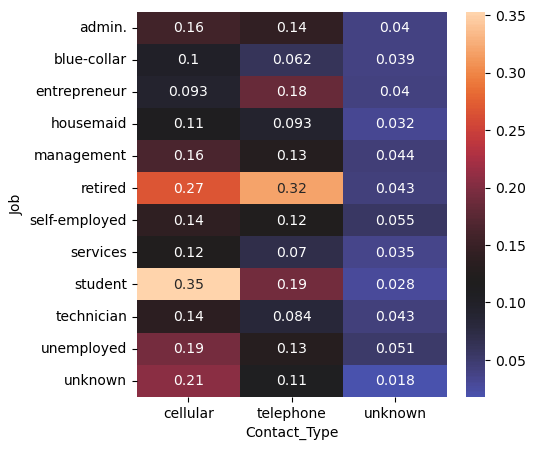

In [117]:

plt.figure(figsize=(5,5))
sns.heatmap(PT_Job_contactmode,annot=True,center=df['Response_Signal'].mean())

In [118]:
PT_Job_contactmode1=pd.pivot_table(data=df,index='Marital_Status',columns='Contact_Type',values='Response_Signal')
PT_Job_contactmode1

Contact_Type,cellular,telephone,unknown
Marital_Status,,,
divorced,0.146209,0.184502,0.053449
married,0.129903,0.128600,0.033159
single,0.188069,0.130856,0.052678


<Axes: xlabel='Contact_Type', ylabel='Marital_Status'>

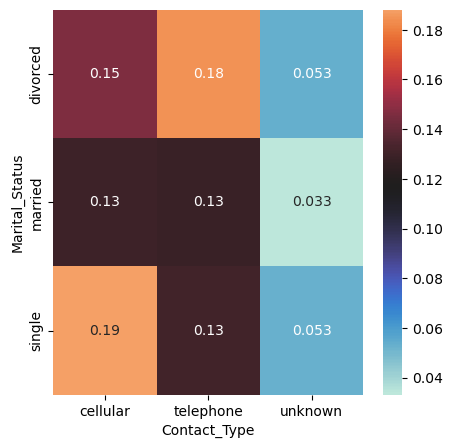

In [119]:
plt.figure(figsize=(5,5))
sns.heatmap(PT_Job_contactmode1,annot=True,center=df['Response_Signal'].mean())